In [26]:
'''
-> LDA is a linear model for classification and dimensionality reduction
-> Feature extraction
'''

'\n-> LDA is a linear model for classification and dimensionality reduction\n-> Feature extraction\n'

In [ ]:
'''
Why LDA?
-> Logistic reg is most popular linear classification models that perform binary classification but 
falls short in multiclass classification

"Instead of finding new axes that maximize the variation in the data, 
it focuses on maximinzing the seperability among the know classes in the target columns"

'''

In [ ]:
'''
LDA()

n_components --?

==> min(n_classes-1, no.of features) ==>min(10-1, 64) => min(9,65) ==> 9

'''

In [ ]:
'''
Steps to perform LDA:
    1) Import the libraries
    2) Data loading
    4) EDA
    3) Standardizing
    4) x & y, train test split
    5) Model building
       LDA
       Classification model
       
'''

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis #LDA
from sklearn.model_selection import train_test_split

In [4]:
digits = datasets.load_digits()

In [5]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [6]:
data1 = pd.DataFrame(digits.data)
data1

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


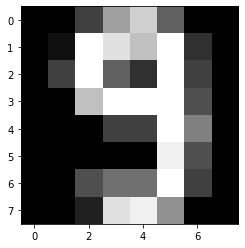

In [7]:
plt.imshow(digits.images[1792], cmap = plt.cm.gray)

In [8]:
X = digits.data
y = digits.target

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state = 999)

In [10]:
#feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [11]:
t1 = pd.DataFrame(digits.target)
t1

,0
0,0
1,1
2,2
3,3
4,4
...,...
1792,9
1793,0
1794,8
1795,9


In [12]:
t1.value_counts()

3    183
1    182
5    182
4    181
6    181
9    180
7    179
0    178
2    177
8    174
dtype: int64

In [13]:
#LDA
lda = LinearDiscriminantAnalysis(n_components=9) #min(9,64)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test) 
X_train.shape

(1437, 9)

In [18]:
X_test

array([[-2.34417168, -0.09349835, -0.30156565, ...,  0.39916456,
        -3.15168656,  3.16787036],
       [-4.17999252,  0.74410367, -0.69874602, ...,  2.82875875,
         0.9350486 , -0.27836174],
       [-2.00010724,  1.03189738,  0.89651202, ...,  1.80073053,
         0.96230096,  0.2203713 ],
       ...,
       [ 1.61287473,  4.79146739, -0.7630859 , ..., -1.298737  ,
         1.24982243, -1.60212004],
       [ 6.60625864, -0.51197403,  1.01297005, ...,  2.03388883,
        -1.16726512, -0.37108626],
       [-0.77849518, -4.09320887,  1.43346579, ...,  1.37629412,
         1.94781409,  0.51907481]])

## RandomForestClassifier

In [20]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=100)
rf.fit(X_train,y_train) #training

RandomForestClassifier()

In [21]:
y_pred=rf.predict(X_test) #y_test

In [22]:
y_pred

array([9, 3, 3, 1, 3, 6, 9, 6, 1, 4, 8, 8, 4, 5, 8, 8, 3, 6, 9, 1, 9, 2,
       2, 5, 7, 6, 8, 8, 2, 2, 6, 0, 2, 2, 3, 0, 2, 6, 0, 0, 2, 1, 3, 9,
       1, 2, 2, 3, 7, 0, 9, 1, 2, 4, 4, 0, 7, 6, 7, 3, 9, 9, 0, 3, 1, 2,
       5, 6, 6, 8, 2, 4, 9, 4, 4, 1, 2, 0, 6, 6, 5, 7, 0, 4, 9, 2, 6, 8,
       1, 9, 4, 0, 9, 0, 7, 6, 2, 0, 6, 8, 1, 0, 6, 6, 3, 4, 7, 9, 4, 2,
       6, 5, 6, 0, 5, 5, 9, 8, 1, 8, 1, 0, 4, 9, 4, 5, 3, 4, 7, 7, 8, 9,
       8, 1, 1, 8, 2, 4, 6, 4, 0, 9, 6, 6, 4, 2, 3, 6, 6, 4, 0, 1, 1, 7,
       3, 7, 8, 0, 1, 6, 2, 3, 9, 2, 2, 1, 7, 4, 0, 4, 7, 5, 5, 7, 9, 1,
       5, 4, 9, 4, 8, 1, 3, 4, 3, 1, 1, 4, 3, 5, 2, 4, 7, 6, 9, 6, 8, 0,
       2, 1, 0, 8, 0, 2, 0, 9, 2, 9, 2, 3, 6, 2, 7, 9, 2, 4, 0, 8, 8, 1,
       9, 2, 4, 4, 0, 3, 5, 5, 6, 5, 9, 9, 9, 4, 9, 3, 3, 8, 2, 0, 6, 6,
       3, 0, 7, 2, 6, 0, 1, 1, 9, 9, 3, 7, 4, 1, 8, 9, 0, 2, 3, 0, 5, 2,
       4, 2, 7, 7, 9, 0, 5, 8, 6, 2, 4, 2, 3, 4, 3, 8, 5, 8, 4, 5, 5, 2,
       4, 5, 0, 3, 9, 2, 0, 5, 0, 1, 1, 7, 7, 1, 1,

In [23]:
y_test

array([9, 3, 3, 1, 3, 6, 9, 6, 1, 4, 8, 8, 4, 5, 8, 8, 3, 6, 9, 1, 9, 2,
       2, 5, 7, 6, 8, 8, 2, 2, 6, 0, 2, 2, 3, 0, 2, 6, 0, 0, 2, 1, 3, 9,
       1, 2, 2, 5, 7, 0, 9, 2, 2, 4, 4, 0, 7, 6, 7, 3, 5, 9, 0, 3, 1, 2,
       5, 6, 6, 8, 2, 0, 9, 4, 4, 1, 2, 0, 6, 6, 5, 7, 0, 4, 9, 2, 6, 8,
       1, 9, 4, 0, 9, 0, 7, 6, 2, 0, 6, 9, 1, 0, 6, 6, 3, 4, 7, 9, 4, 2,
       6, 5, 6, 0, 5, 5, 9, 8, 1, 8, 1, 0, 4, 9, 4, 5, 3, 4, 7, 7, 8, 9,
       3, 1, 8, 8, 2, 4, 6, 4, 0, 9, 6, 6, 4, 2, 3, 6, 6, 4, 0, 1, 1, 7,
       3, 7, 8, 0, 8, 6, 2, 3, 9, 2, 2, 1, 7, 4, 0, 4, 7, 5, 5, 7, 9, 1,
       5, 4, 9, 4, 8, 1, 3, 4, 3, 1, 1, 4, 9, 5, 2, 4, 7, 6, 9, 6, 8, 0,
       2, 1, 0, 8, 0, 2, 0, 9, 2, 9, 2, 3, 4, 2, 7, 9, 2, 4, 0, 8, 8, 1,
       9, 2, 4, 4, 0, 3, 5, 5, 6, 5, 9, 7, 9, 4, 9, 3, 3, 8, 2, 0, 6, 6,
       3, 0, 7, 2, 6, 0, 1, 1, 9, 9, 3, 7, 4, 1, 8, 9, 0, 3, 3, 0, 5, 2,
       4, 2, 7, 7, 9, 0, 5, 8, 6, 2, 4, 2, 3, 4, 3, 8, 5, 8, 4, 5, 5, 2,
       4, 9, 0, 3, 9, 2, 0, 5, 0, 1, 1, 7, 7, 1, 6,

In [24]:
from sklearn.metrics import *
confusion_matrix(y_pred, y_test)

array([[39,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 33,  1,  0,  0,  0,  1,  0,  2,  0],
       [ 0,  0, 44,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 32,  0,  1,  0,  0,  0,  1],
       [ 1,  0,  0,  0, 43,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 25,  0,  0,  0,  1],
       [ 0,  2,  0,  0,  1,  0, 34,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 27,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0, 25,  1],
       [ 0,  0,  0,  1,  1,  1,  0,  1,  0, 40]], dtype=int64)

In [25]:
accuracy_score(y_pred, y_test)

0.95